In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import os
import json
import pprint
from IPython.core.display import display
%matplotlib inline
import tweepy
import networkx as nx
import random
from pyvis.network import Network

from functions_file import *
#del Functions
import matplotlib.pyplot as plt
from pylab import rcParams
from networkx.algorithms.approximation import clique
from scipy import stats
data_folder = "data"
print("imported completed!")

imported completed!


In [2]:
consumer_key = "ilMCDSvsK2gQPzNpExcN9w0dj"
consumer_secret = "LJhNjYbJwHOcmzihgJDsaVIdYxgkCF3aezr4v1k9pQkoH9mmgl"
access_token = "426038638-16YAVtywETEPoD9F1M5P6I3IavaZwRUF3RdjVTGd"
access_secret = "n0G7Hddsjm9HAFvvNY1ntNQk475PUTJg4Ub8F1x6k8ozn"
bearer_token = "AAAAAAAAAAAAAAAAAAAAAPUTJQEAAAAA8%2FTr01XqXtQ7NcaRUgtKtK2M%2BR0%3D7AByu1bjwYdcf0Xs7mOeVb6FKNCYEIW4VN16WMrB7CO7G1xXxU"

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
if api.verify_credentials :
  print ('Authentication completed successfully!')

Authentication completed successfully!


In [4]:
users = ["mizzaro","damiano10","Miccighel_","eglu81","KevinRoitero"]
usersId = Functions.usersID(users,api)
print(usersId)

[18932422, 132646210, 15750573, 19659370, 3036907250]


In [15]:
quantity = 10
index = 0
for idUser in usersId:
    followers = Functions.download_followers(idUser, quantity,api)
    Functions.serialize_json(data_folder,f"followers_{users[index]}.json", followers)
    index += 1

Data serialized to path: data/00followers_mizzaro.json
Data serialized to path: data/00followers_damiano10.json
Data serialized to path: data/00followers_Miccighel_.json
Data serialized to path: data/00followers_eglu81.json
Data serialized to path: data/00followers_KevinRoitero.json


In [58]:
quantity = 800
index = 0
for idUser in usersId:
    friends = Functions.download_following(idUser, quantity,api)
    Functions.serialize_json(data_folder,f"friends_{users[index]}.json", friends)
    index +=1

Data serialized to path: data/friendsLucaThomas.json


In [10]:
#creo vettore con tutti gli id degli utenti senza duplicazione
files = [
    f"{data_folder}/followers_damiano10.json",
    f"{data_folder}/followers_eglu81.json",
    f"{data_folder}/followers_Miccighel_.json",
    f"{data_folder}/followers_mizzaro.json",
    f"{data_folder}/followers_KevinRoitero.json"
]
# Estraggo per ogni utente 5 followers

randomUsers = 5
quantity = 10
followersOfFollowers = {}
for file in files:
    found = []
    followers = Functions.read_json(file)
    found = Functions.random_json_with_control(followers, randomUsers)
    for user in found:
        followersOfFollowers[user] = Functions.download_followers(user, quantity,api)

Functions.serialize_json(data_folder,"followersOfFollowers.json", followersOfFollowers)

Data read fron path: data/followers_damiano10.json
Data read fron path: data/followers_eglu81.json
Data read fron path: data/followers_Miccighel_.json
Data read fron path: data/followers_mizzaro.json
Data read fron path: data/followers_KevinRoitero.json
Data serialized to path: data/followersOfFollowers.json


Rate limit reached. Sleeping for: 860
Rate limit reached. Sleeping for: 894


In [62]:
files = [
    f"{data_folder}/friends_damiano10.json",
    f"{data_folder}/friends_eglu81.json",
    f"{data_folder}/friends_Miccighel_.json",
    f"{data_folder}/friends_mizzaro.json",
    f"{data_folder}/friends_KevinRoitero.json"
]
# Estraggo per ogni utente 5 followers
randomUsers = 5
quantity = 10
friendsOfFriends = {}
for file in files:
    found = []
    friends = Functions.read_json(file)
    found = Functions.random_json_with_control(friends, randomUsers)
    for user in found:
        friendsOfFriends[user] = Functions.download_following(user, quantity,api)

Functions.serialize_json(data_folder,"friendsOfFriends.json", friendsOfFriends)

Data read fron path: data/friendsLucaThomas.json
Data serialized to path: data/friendsOfFriends.json


In [6]:
file_names = [
    f"{data_folder}/followersOfFollowers.json",
    f"{data_folder}/friendsOfFriends.json",

    f"{data_folder}/followers_damiano10.json",
    f"{data_folder}/followers_eglu81.json",
    f"{data_folder}/followers_KevinRoitero.json",
    f"{data_folder}/followers_Miccighel_.json",
    f"{data_folder}/followers_mizzaro.json",

    f"{data_folder}/friends_damiano10.json",
    f"{data_folder}/friends_eglu81.json",
    f"{data_folder}/friends_KevinRoitero.json",
    f"{data_folder}/friends_Miccighel_.json",
    f"{data_folder}/friends_mizzaro.json"
]

#creo vettore con tutti gli id degli utenti senza duplicazione
noDuplicates =  Functions.deleteDuplicates(Functions.mergeFiles(file_names))

usersId = Functions.usersID(users,api)

for id in usersId:
    noDuplicates.remove(id)

Functions.serialize_json(data_folder,"noDuplicati.json", noDuplicates)

Data read fron path: data/followersOfFollowers.json
Data read fron path: data/friendsOfFriends.json
Data read fron path: data/followers_damiano10.json
Data read fron path: data/followers_eglu81.json
Data read fron path: data/followers_KevinRoitero.json
Data read fron path: data/followers_Miccighel_.json
Data read fron path: data/followers_mizzaro.json
Data read fron path: data/friends_damiano10.json
Data read fron path: data/friends_eglu81.json
Data read fron path: data/friends_KevinRoitero.json
Data read fron path: data/friends_Miccighel_.json
Data read fron path: data/friends_mizzaro.json
Data serialized to path: data/noDuplicati.json


In [ ]:
vector = Functions.read_json(f"{data_folder}/noDuplicati.json")
index = 0
usersDetails = {}
def downloadUserDetails(userId, api):
    try:
        json_data = api.get_user(userId)._json
        foundInfo = {
            'id': json_data['id'],
            'name': json_data['name'],
            'screen_name': json_data['screen_name'],
            'location': json_data['location'],
            'followers_count': json_data['followers_count'],
            'friends_count': json_data['friends_count']
        }
        return foundInfo
    except tweepy.error.TweepError:
        print(userId)

for userId in range(0,750):
    usersDetails[index] = downloadUserDetails(vector[userId],api)
    index = index + 1

df = pd.DataFrame.from_dict(usersDetails,orient='index')
display(df)
df.to_csv("usersDetailsAgu.csv", index=False, encoding='utf-8')

In [ ]:
def friendship(sourceid, targetid, api):
    try:
        friendship = api.show_friendship(source_id=sourceid, target_id=targetid)
        if friendship[0].following & friendship[0].followed_by:
            return "Both"
        else:
            if friendship[0].following:
                return "SourceToTarget"
            if friendship[0].followed_by:
                return "TargetToSource"
            return None
    except tweepy.error.TweepError:
        print("errore")
        print(targetid)
        return None

usersId = Functions.usersID(users,api)
list = Functions.read_json(f"{data_folder}/noDuplicati.json")
index = 0
sourceTarget =[]

for target in list:
    print(target)
    relation = friendship(usersId[3],target,api)
    if relation:
        foundFriendship = {
            "source": usersId[3],
            "target": target,
            "friendship": relation
        }
        sourceTarget.append(foundFriendship)

df = pd.DataFrame(sourceTarget)
display(df)
df.to_csv("sourceTarget.csv",index = False , encoding='utf-8')

In [5]:
dfUsersDetails = pd.read_csv("usersDetailsULTIMATE.csv")
dfUsersFriendship = pd.read_csv("sourceTargetULTIMATE.csv")

graph = nx.DiGraph()

#aggiunta membri gruppo come attributi
graph.graph["members"] = ["Luca","Thomas","Agustin","Edoardo"]

for index,row in dfUsersDetails.iterrows():
    graph.add_node(row['id'], name = row['name'],screen_name=row['screen_name'],location = row['location'],followers_count = row['followers_count'],friends_count = row['friends_count'])

for index, row in dfUsersFriendship.iterrows():
    if row["friendship"] == "SourceToTarget":
        graph.add_edge(row["source"], row["target"])
    elif row["friendship"] == "TargetToSource" :
        graph.add_edge(row["target"], row["source"])
    else :
        graph.add_edge(row["source"], row["target"])
        graph.add_edge(row["target"], row["source"])

nx.write_gpickle(graph,"data/orientedGraph.pkl")

In [6]:
dfUsersDetails = pd.read_csv("usersDetailsULTIMATE.csv")
dfUsersFriendship = pd.read_csv("sourceTargetULTIMATE.csv")
display(dfUsersDetails)
display(dfUsersFriendship)

graph = nx.Graph()

#aggiunta membri gruppo come attributi
graph.graph["members"] = ["Luca","Thomas","Agustin","Edoardo"]

for index,row in dfUsersDetails.iterrows():
    graph.add_node(row['id'], label = row['screen_name'],location = row['location'],followers_count = row['followers_count'],friends_count = row['friends_count'])

for index, row in dfUsersFriendship.iterrows():
    graph.add_edge(row["source"], row["target"],weight = 1,id = index)

nx.write_gpickle(graph,"data/unOrientedGraph.pkl")

,id,name,screen_name,location,followers_count,friends_count
0,989428140433866752,Innovation Center for Artificial Intelligence,ic4ai,"Amsterdam, The Netherlands",1079,15
1,984275749824638976,ielab,IELabGroup,"Brisbane, Queensland",75,66
2,3235806942,Justin Zobel,j_zob,"Melbourne, Victoria",86,13
3,862356144748204032,DESIRES2020,DESIRES_IR,"Venezia, Veneto",269,111
4,610026759,Rocío Cañamares,rcanamares,NaN,101,98
...,...,...,...,...,...,...
3102,1011316249274540033,AI for Retail (AIR) Lab,AIforRetail,"Amsterdam, The Netherlands",584,994
3103,48062712,Luigi Di Maio,luigidimaio,"Pomigliano d'Arco, Campania",698293,386
3104,54163837,Philipp Mayr,Philipp_Mayr,"Colonia, Germania",1024,328
3105,911297187664949248,Jeff Dean (@🏡),JeffDean,NaN,175712,4274


,source,target,friendship
0,19659370,18932422,Both
1,19659370,132646210,Both
2,19659370,15750573,TargetToSource
3,19659370,1425336134,TargetToSource
4,19659370,918943909811769344,TargetToSource
...,...,...,...
3309,15750573,131526573,SourceToTarget
3310,15750573,13533662,SourceToTarget
3311,15750573,52352322,SourceToTarget
3312,15750573,58324434,SourceToTarget


In [7]:
#punto 6

graph = nx.read_gpickle("data/unOrientedGraph.pkl")

nt = Network(
    height="100%",
    width="100%",
    bgcolor="222222",
    font_color="white",
    heading="progetto"
)
nt.barnes_hut()
nt.from_nx(graph)
neighbor_map = nt.get_adj_list()
for node in nt.nodes:
    node["Value"] = len(neighbor_map[node['id']])
nt.show("grafico.html")

In [14]:
from networkx.algorithms.distance_measures import center

noOriented = nx.read_gpickle("data/unOrientedGraph.pkl")
oriented = nx.read_gpickle("data/orientedGraph.pkl")

if(nx.is_connected(noOriented)):
    print("Grafo connesso"),
    print("Centro: ", end=" ")
    print(nx.center(noOriented))
    print("Diametro: ", end=" ")
    print(nx.diameter(noOriented))
    print("Raggio: ", end=" ")
    print(nx.radius(noOriented))

else:
    print("Grafo non connesso")


if(nx.is_bipartite(noOriented)):
    print("Grafo bipartito")
else:
    print("Grafo non bipartito")

bet = nx.betweenness_centrality(noOriented)
close = nx.closeness_centrality(noOriented)
degree = nx.degree_centrality(noOriented)
ind = nx.in_degree_centrality(oriented)
outd = nx.out_degree_centrality(oriented)
pr = nx.pagerank(oriented)
hub, authorities = nx.hits(oriented, max_iter=600)

Functions.serialize_json(data_folder,"Betweenness.json", bet)
Functions.serialize_json(data_folder,"Closeness.json", close)
Functions.serialize_json(data_folder,"Degree.json", degree)
Functions.serialize_json(data_folder,"In_degree.json", ind)
Functions.serialize_json(data_folder,"Out_degree.json", outd)
Functions.serialize_json(data_folder,"Pagerank.json", pr)
Functions.serialize_json(data_folder,"Hub.json", hub)
Functions.serialize_json(data_folder,"Authorities.json", authorities)

Grafo non connesso
Grafo non bipartito
Data serialized to path: data/Betweenness.json
Data serialized to path: data/Closeness.json
Data serialized to path: data/Degree.json
Data serialized to path: data/In_degree.json
Data serialized to path: data/Out_degree.json
Data serialized to path: data/Pagerank.json
Data serialized to path: data/Hub.json
Data serialized to path: data/Authorities.json


Cricca massima:  {19659370, 3036907250, 132646210, 18932422}
 
Dimensione della cricca massima:  5
 


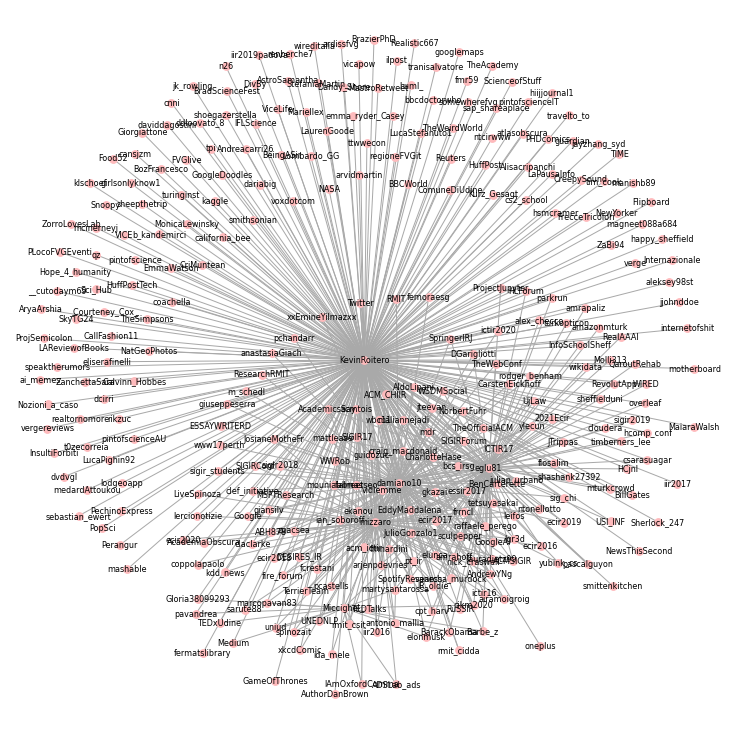

In [28]:
oriented = nx.read_gpickle("data/orientedGraph.pkl")

#genero sottografo
subgraph = nx.ego_graph(noOriented,  Functions.userID("KevinRoitero",api), radius=1)


#cricca massima
print("Cricca massima: ", end=" ")
print(clique.max_clique(subgraph))
print(" ")

#dimensione cricca massima
print("Dimensione della cricca massima: ", end=" ")
print(clique.large_clique_size(subgraph))
print(" ")

plt.figure("Kevin Roitero",figsize=(10,10)) 

nx.draw(
    subgraph,
    labels = nx.get_node_attributes(subgraph, 'label'),
    pos = nx.spring_layout(subgraph),
    node_color = "#febabc",
    edge_color = "#A9A9A9",
    edge_cmap = plt.cm.Blues,
    node_size=60,
    font_size=8
)

plt.savefig("data/subgraph.pdf")
plt.show()
plt.close()

In [61]:
#copertura minima degli archi
noOriented = nx.read_gpickle("data/unOrientedGraph.pkl")
if(nx.is_connected(noOriented)):
    print("Copertura minima degli archi: ", end=" ")
    print(nx.min_edge_cover(noOriented))
    print(" ")
else:
    print("La copertura minima degli archi non si puo' calcolare")

La copertura minima degli archi non si puo' calcolare


In [ ]:
noOriented = nx.read_gpickle("data/unOrientedGraph.pkl")
print("Coefficiente omega: ", end=" ")
print(nx.omega(noOriented))
print(" ")
print("Coefficiente sigma: ", end=" ")
print(nx.sigma(noOriented))
print(" ")

Coefficiente omega:  

In [22]:
#Punto 13 Correlazione di Pearson
bet = Functions.read_json(f"{data_folder}/Betweenness.json")
close = Functions.read_json(f"{data_folder}/Closeness.json")
degree = Functions.read_json(f"{data_folder}/Degree.json")
ind = Functions.read_json(f"{data_folder}/In_degree.json")
outd = Functions.read_json(f"{data_folder}/Out_degree.json")
pr = Functions.read_json(f"{data_folder}/Pagerank.json")
hub = Functions.read_json(f"{data_folder}/Hub.json")
authorities = Functions.read_json(f"{data_folder}/Authorities.json")

allCent = [bet, close, degree, ind, outd, pr, hub, authorities]
allCent1 = np.empty((0,8), int)
dataTab = np.empty((0,8), int)

n_nodes = noOriented.number_of_nodes()

allCent1 = Functions.converterNumber(allCent, n_nodes)

tab = {}
tabTemp = {}
names = ["Betweenness", "Closeness", "Degree", "In-Degree", "Out-Degree", "Page Rank", "Hub", "Authorities"]
y = 0
res = []
#calcolo indice
for i in range(0,8):
    res.clear()
    for j in range(0,8):
        res.append(stats.stats.pearsonr(allCent1[i], allCent1[j]))

    x = 0
    tabTemp.clear()
    for re in res:
        nameCol = names[x]
        tabTemp[nameCol] = re
        x = x + 1

    nameRow = names[y]
    tab[nameRow] = tabTemp.copy()
    y = y + 1

df = pd.DataFrame.from_dict(tab,orient='index')
display(df)

Data read fron path: data/Betweenness.json
Data read fron path: data/Closeness.json
Data read fron path: data/Degree.json
Data read fron path: data/In_degree.json
Data read fron path: data/Out_degree.json
Data read fron path: data/Pagerank.json
Data read fron path: data/Hub.json
Data read fron path: data/Authorities.json
3106


,Betweenness,Closeness,Degree,In-Degree,Out-Degree,Page Rank,Hub,Authorities
Betweenness,"(1.0, 0.0)","(0.06943149558940863, 0.00010766380444644407)","(0.9925881480515019, 0.0)","(0.9957715216130723, 0.0)","(0.9717908276488796, 0.0)","(0.9944211261162004, 0.0)","(0.9012773885207632, 0.0)","(0.3348997642715955, 2.799149592878257e-82)"
Closeness,"(0.06943149558940863, 0.00010766380444644407)","(1.0, 0.0)","(0.08565553044895785, 1.7479253674021302e-06)","(0.08685134950760914, 1.249832529061592e-06)","(0.08310610689548903, 3.521579395617192e-06)","(0.08001562183534311, 8.016022228070661e-06)","(0.14809679352469357, 1.0756802735331242e-16)","(0.4390338509451755, 1.5443966064191888e-146)"
Degree,"(0.9925881480515019, 0.0)","(0.08565553044895785, 1.7479253674021302e-06)","(1.0, 0.0)","(0.991535161370898, 0.0)","(0.9927668269877167, 0.0)","(0.9859371921341791, 0.0)","(0.9383865642174899, 0.0)","(0.3565822389036358, 8.718156645901567e-94)"
In-Degree,"(0.9957715216130723, 0.0)","(0.08685134950760914, 1.249832529061592e-06)","(0.991535161370898, 0.0)","(0.9999999999999939, 0.0)","(0.971337974268428, 0.0)","(0.9989901432976857, 0.0)","(0.9139665132391412, 0.0)","(0.37308114341652776, 3.628908833039318e-103)"
Out-Degree,"(0.9717908276488796, 0.0)","(0.08310610689548903, 3.521579395617192e-06)","(0.9927668269877167, 0.0)","(0.971337974268428, 0.0)","(0.9999999999999917, 0.0)","(0.9619895350889294, 0.0)","(0.9626453290634807, 0.0)","(0.34711887711727385, 1.1884573947564457e-88)"
Page Rank,"(0.9944211261162004, 0.0)","(0.08001562183534311, 8.016022228070661e-06)","(0.9859371921341791, 0.0)","(0.9989901432976857, 0.0)","(0.9619895350889294, 0.0)","(1.0, 0.0)","(0.9029705872921004, 0.0)","(0.35650675874599735, 9.595740354151042e-94)"
Hub,"(0.9012773885207632, 0.0)","(0.14809679352469357, 1.0756802735331242e-16)","(0.9383865642174899, 0.0)","(0.9139665132391412, 0.0)","(0.9626453290634807, 0.0)","(0.9029705872921004, 0.0)","(0.9999999999999987, 0.0)","(0.36820712294071783, 2.446838604625622e-100)"
Authorities,"(0.3348997642715955, 2.799149592878257e-82)","(0.4390338509451755, 1.5443966064191888e-146)","(0.3565822389036358, 8.718156645901567e-94)","(0.37308114341652776, 3.628908833039318e-103)","(0.34711887711727385, 1.1884573947564457e-88)","(0.35650675874599735, 9.595740354151042e-94)","(0.36820712294071783, 2.446838604625622e-100)","(0.9999999999999949, 0.0)"


In [16]:
bet = Functions.read_json(f"{data_folder}/Betweenness.json")
close = Functions.read_json(f"{data_folder}/Closeness.json")
degree = Functions.read_json(f"{data_folder}/Degree.json")
ind = Functions.read_json(f"{data_folder}/In_degree.json")
outd = Functions.read_json(f"{data_folder}/Out_degree.json")
pr = Functions.read_json(f"{data_folder}/Pagerank.json")
hub = Functions.read_json(f"{data_folder}/Hub.json")
authorities = Functions.read_json(f"{data_folder}/Authorities.json")

allCent = [bet, close, degree, ind, outd, pr, hub, authorities]
res = []
allCent1 = np.empty((0,8), int)
dataTab = np.empty((0,8), int)

n_nodes = noOriented.number_of_nodes()

allCent1 = Functions.converterNumber(allCent, n_nodes)


tab = {}
tabTemp = {}
names = ["Betweenness", "Closeness", "Degree", "In-Degree", "Out-Degree", "Page Rank", "Hub", "Authorities"]
y = 0
tau = []
pvalue = []
#calcolo indice
for i in range(0,8):
    tau.clear()
    pvalue.clear()
    tabTemp.clear()
    for j in range(0,8):
        tauTemp, pvalueTemp = stats.kendalltau(allCent1[i], allCent1[j])
        tau.append(tauTemp)
        pvalue.append(pvalueTemp)
    x = 0
    tabTemp.clear()
    for ta in tau:
        nameCol = names[x]
        tabTemp[nameCol] = "(" + str(ta) + ", " + str(pvalue[x]) + ")"
        x = x + 1

    nameRow = names[y]
    tab[nameRow] = tabTemp.copy()
    y = y + 1

df = pd.DataFrame.from_dict(tab,orient='index')
display(df)

Data read fron path: data/Betweenness.json
Data read fron path: data/Closeness.json
Data read fron path: data/Degree.json
Data read fron path: data/In_degree.json
Data read fron path: data/Out_degree.json
Data read fron path: data/Pagerank.json
Data read fron path: data/Hub.json
Data read fron path: data/Authorities.json


,Betweenness,Closeness,Degree,In-Degree,Out-Degree,Page Rank,Hub,Authorities
Betweenness,"(0.9999999999999999, 0.0)","(0.04523127856917721, 0.004219117516665733)","(0.1268913218760698, 1.8029368346397369e-13)","(0.094539906187517, 3.938396608214845e-08)","(0.07476922884167772, 1.9648034573303044e-05)","(0.08428607797651803, 1.6800058379553596e-07)","(0.046124914513165055, 0.004756958003573445)","(0.05829579171096908, 0.0002963948462369272)"
Closeness,"(0.04523127856917721, 0.004219117516665733)","(0.9999999999999999, 0.0)","(0.6659587750066086, 0.0)","(0.40280973216960925, 3.318780439456277e-155)","(0.3294215786605153, 6.528218085661408e-101)","(0.4219559490964824, 8.445449172939113e-194)","(0.4707404411602607, 4.4239739130416797e-234)","(0.533513182821571, 1.5148672174832966e-308)"
Degree,"(0.1268913218760698, 1.8029368346397369e-13)","(0.6659587750066086, 0.0)","(0.9999999999999999, 0.0)","(0.6175093354018548, 8.048786887450913e-305)","(0.40359444954743884, 6.423730731289763e-127)","(0.5094893245152516, 3.064357052347593e-237)","(0.35226467772504755, 2.340653586073292e-111)","(0.5218752583770698, 8.245047236707294e-249)"
In-Degree,"(0.094539906187517, 3.938396608214845e-08)","(0.40280973216960925, 3.318780439456277e-155)","(0.6175093354018547, 8.048786887450913e-305)","(1.0, 0.0)","(-0.15327664088201293, 7.877422662713973e-20)","(0.8603288583777224, 0.0)","(-0.11579684268088777, 1.5614995560189157e-13)","(0.8642474489790467, 0.0)"
Out-Degree,"(0.07476922884167772, 1.9648034573303044e-05)","(0.3294215786605153, 6.528218085661408e-101)","(0.40359444954743884, 6.423730731289763e-127)","(-0.1532766408820129, 7.877422662713973e-20)","(1.0, 0.0)","(-0.11957694863689629, 3.063641258643291e-14)","(0.8708632888443416, 0.0)","(-0.11861052069926911, 4.912882300302524e-14)"
Page Rank,"(0.08428607797651803, 1.6800058379553596e-07)","(0.42195594909648243, 8.445449172939113e-194)","(0.5094893245152516, 3.064357052347593e-237)","(0.8603288583777224, 0.0)","(-0.11957694863689629, 3.063641258643291e-14)","(1.0, 0.0)","(-0.0839561391130635, 1.0852175714363288e-08)","(0.8265323112531047, 0.0)"
Hub,"(0.04612491451316504, 0.004756958003573445)","(0.4707404411602607, 4.4239739130416797e-234)","(0.3522646777250476, 2.340653586073292e-111)","(-0.11579684268088777, 1.5614995560189157e-13)","(0.8708632888443416, 0.0)","(-0.08395613911306352, 1.0852175714363288e-08)","(1.0, 0.0)","(-0.058280708271980584, 7.232055500796871e-05)"
Authorities,"(0.05829579171096908, 0.0002963948462369272)","(0.5335131828215709, 1.5148672174832966e-308)","(0.5218752583770698, 8.245047236707294e-249)","(0.8642474489790467, 0.0)","(-0.11861052069926911, 4.912882300302524e-14)","(0.8265323112531047, 0.0)","(-0.05828070827198058, 7.232055500796871e-05)","(1.0, 0.0)"


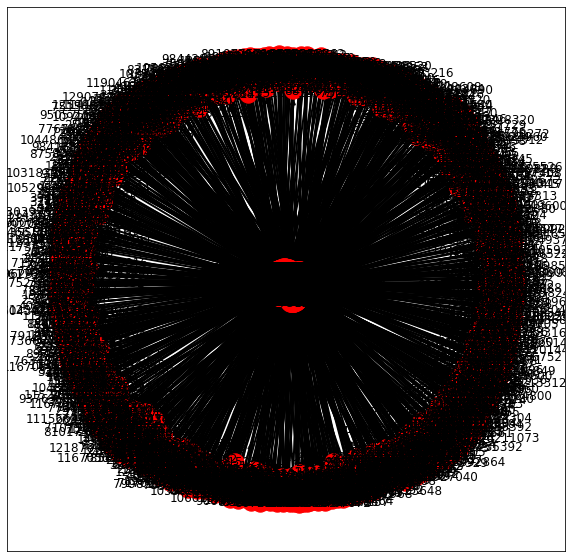

In [11]:
#Provo a disegnarlo (non scritto nella consegna)

rcParams['figure.figsize'] = 10,10

nx.draw_networkx(
    oriented,
    pos = nx.spring_layout(oriented),
    node_color = "#FF0000",
    width = 2,
    edge_cmap = plt.cm.Blues,
    with_labels = True
)
plt.show()
plt.close()

In [ ]:
new = pd.read_csv("sourceTargetULTIMATE.csv")
old = pd.read_csv("usersDetailsULTIMATE.csv")

new2 = []

for index,row in new.iterrows():
    new2.append(row['target'])
    


for index,row in old.iterrows():
    if row['id'] not in new2:
        print(row['id'])



In [ ]:
datogliere = Functions.read_json(f"{data_folder}/prensente.json")
qua = pd.read_csv("usersDetailsULTIMATE.csv")

print(len(datogliere))
print(len(qua))

for item in datogliere:
    for index,row in qua.iterrows():
        if row['id'] == item:
            qua.drop([index],axis=0,inplace=True)

print(len(qua))